In [1]:
import sys
from pathlib import Path

PROJECT_ROOT = Path().resolve().parent
sys.path.insert(0, str(PROJECT_ROOT))

In [2]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
from ultralytics import YOLO

In [3]:
RUN_DIR = PROJECT_ROOT / "models" / "runs" / "fruitninja_yolo11n3"
BEST = RUN_DIR / "weights" / "best.pt"
DATA_YAML = PROJECT_ROOT / "datasets" / "fruitninja_yolo" / "data.yaml"

In [4]:
model = YOLO(BEST)
model

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C3k2(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_

In [5]:
results_csv = RUN_DIR / "results.csv"
df = pd.read_csv(results_csv)
df.head()

epoch      time  train/box_loss  train/cls_loss  train/dfl_loss  \
0      1   8.40635         1.12247         3.74823         1.09770   
1      2  11.10110         1.25556         2.60514         1.09247   
2      3  13.41990         1.22549         1.97458         1.10423   
3      4  15.64550         1.18287         1.69479         1.12216   
4      5  17.96100         1.22955         1.53490         1.12596   

   metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0               0.00635            0.99451           0.07099   
1               0.00553            0.99451           0.35631   
2               0.00611            0.98901           0.42655   
3               0.00632            0.96703           0.23966   
4               0.00655            0.97802           0.35248   

   metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
0              0.03600       1.17600       3.32518       1.01847  0.000167   
1              0.15881       1.19804       3.18466       1.01698  0.000347   
2              0.18774       1.08130       3.24729       0.99404  0.000525   
3              0.08297       1.02466       3.28470       1.00083  0.000699   
4              0.18035       1.05437       3.18802       1.02387  0.000870   

     lr/pg1    lr/pg2  
0  0.000167  0.000167  
1  0.000347  0.000347  
2  0.000525  0.000525  
3  0.000699  0.000699  
4  0.000870  0.000870

In [6]:
df.tail()

epoch     time  train/box_loss  train/cls_loss  train/dfl_loss  \
115    116  292.056         0.41322         0.31567         0.81818   
116    117  294.288         0.41904         0.30925         0.80655   
117    118  296.586         0.41066         0.31119         0.81463   
118    119  298.715         0.39726         0.30581         0.79890   
119    120  300.879         0.39427         0.30768         0.79911   

     metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
115               0.97469            0.99338           0.98996   
116               0.97507            0.99328           0.98998   
117               0.97491            0.99399           0.99002   
118               0.97543            0.99125           0.99014   
119               0.97628            0.98901           0.99030   

     metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
115              0.84386       0.58100       0.34513       0.87460  0.000085   
116              0.84360       0.58183       0.34387       0.87479  0.000072   
117              0.85419       0.57734       0.34100       0.87509  0.000058   
118              0.85587       0.57638       0.34101       0.87678  0.000044   
119              0.85025       0.57700       0.33844       0.87806  0.000030   

       lr/pg1    lr/pg2  
115  0.000085  0.000085  
116  0.000072  0.000072  
117  0.000058  0.000058  
118  0.000044  0.000044  
119  0.000030  0.000030

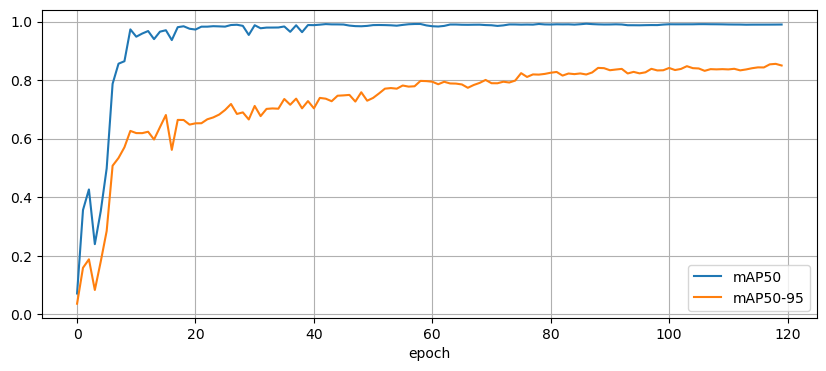

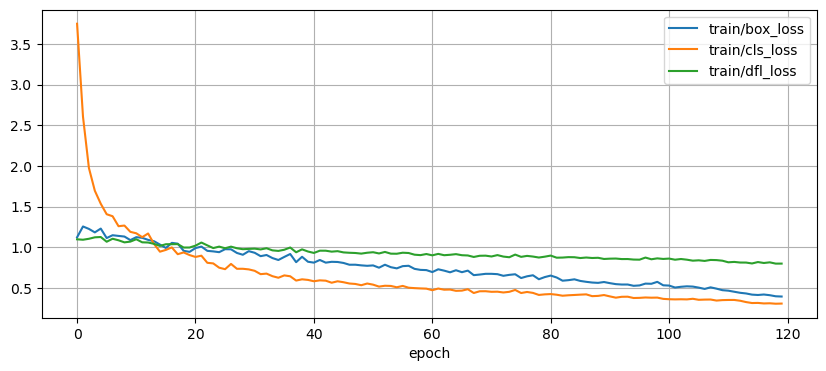

In [7]:
plt.figure(figsize=(10,4))
plt.plot(df["metrics/mAP50(B)"], label="mAP50")
plt.plot(df["metrics/mAP50-95(B)"], label="mAP50-95")
plt.xlabel("epoch")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10,4))
plt.plot(df["train/box_loss"], label="train/box_loss")
plt.plot(df["train/cls_loss"], label="train/cls_loss")
plt.plot(df["train/dfl_loss"], label="train/dfl_loss")
plt.xlabel("epoch")
plt.legend()
plt.grid(True)
plt.show()

In [8]:
val_metrics = model.val(data=str(DATA_YAML), split="val")
val_metrics

Ultralytics 8.3.248  Python-3.11.14 torch-2.5.1 CUDA:0 (NVIDIA GeForce RTX 4060, 8187MiB)


YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients
val: Fast image access  (ping: 0.00.0 ms, read: 303.176.9 MB/s, size: 27.9 KB)
val: Scanning C:\Users\Pichau\Desktop\Programacao\FruitNAI\datasets\fruitninja_yolo\labels\val.cache... 61 images, 7 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 61/61 122.1Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 1.7it/s 2.4s0.4ss
                   all         61        112      0.975      0.991       0.99      0.852
                 fruit         48         91      0.957      0.983      0.985      0.846
                  bomb         17         21      0.994          1      0.995      0.858
Speed: 2.4ms preprocess, 6.5ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to C:\Users\Pichau\Desktop\Programacao\FruitNAI\notebooks\runs\detect\val4


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001604D6ADC90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0

In [9]:
def predict_and_show(model, image_paths, conf=0.25, imgsz=640):
    n = len(image_paths)
    cols = 3
    rows = (n + cols - 1) // cols

    fig, axes = plt.subplots(rows, cols, figsize=(15, 5*rows))
    if rows == 1:
        axes = np.array([axes])

    for i in range(rows * cols):
        r = i // cols
        c = i % cols
        ax = axes[r, c]
        ax.axis("off")

        if i >= n:
            continue

        p = str(image_paths[i])
        results = model.predict(source=p, conf=conf, imgsz=imgsz, verbose=False)
        im = results[0].plot()  # ndarray BGR
        im = im[..., ::-1]      # BGR -> RGB

        ax.imshow(im)
        ax.set_title(Path(p).name)

    plt.tight_layout()
    plt.show()

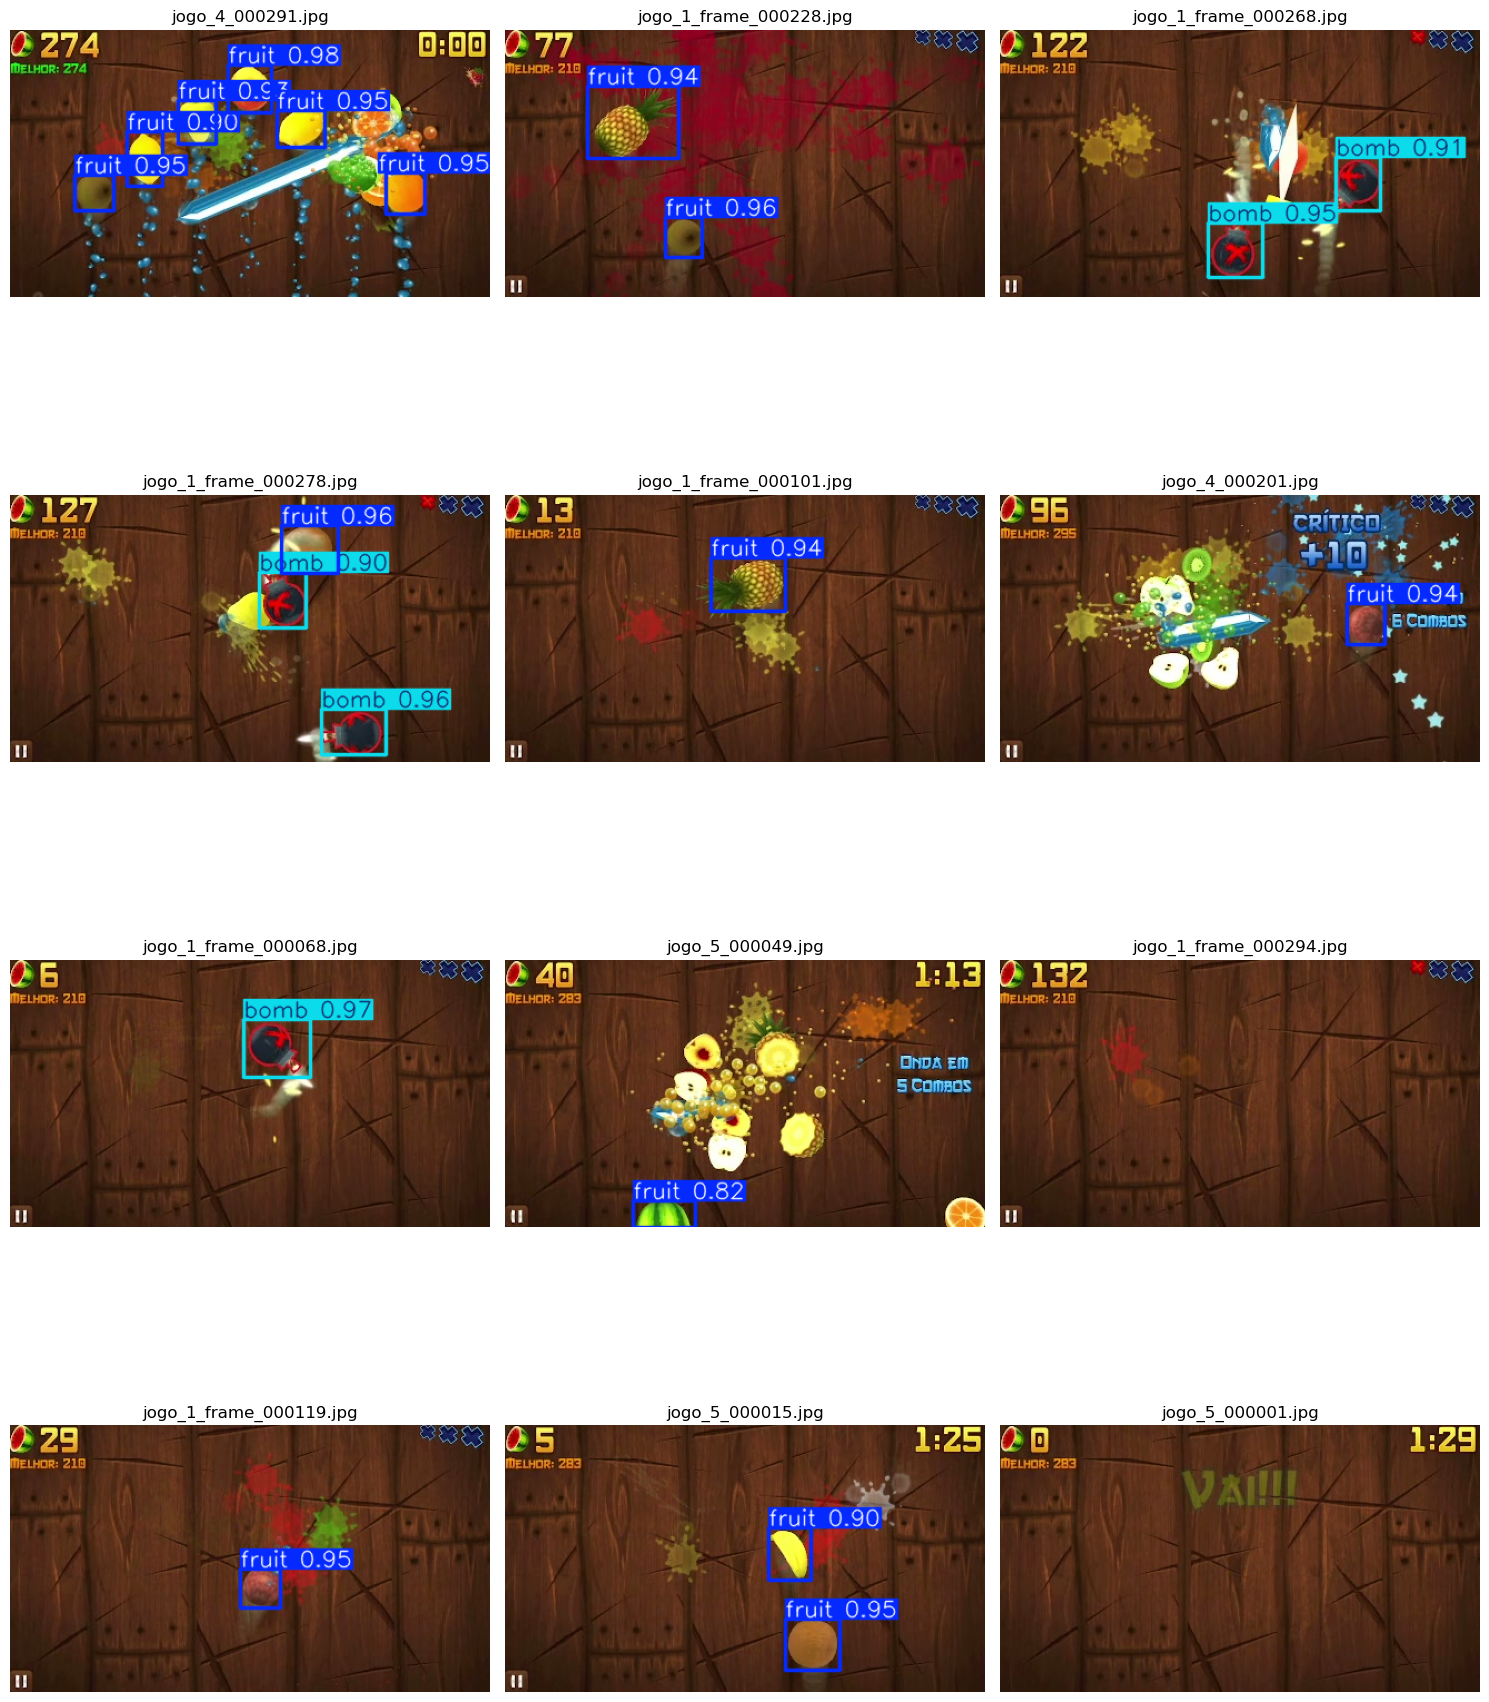

In [10]:
VAL_IMAGES_DIR = PROJECT_ROOT / "datasets" / "fruitninja_yolo" / "images" / "val"
val_imgs = sorted(list(VAL_IMAGES_DIR.glob("*.jpg")))
sample_imgs = random.sample(val_imgs, 12)
predict_and_show(model, sample_imgs, conf=0.5, imgsz=640)

In [ ]:
VIDEO = PROJECT_ROOT / "data" / "raw_videos" / "jogo_2.mp4"

model.predict(
    source=str(VIDEO),
    conf=0.25, 
    imgsz=640,
    show=True,
    save=True,
    project=RUN_DIR,
    name="inference_video"
)

WARNING 
Inference results will accumulate in RAM unless `stream=True` is passed, which can cause out-of-memory errors for large
sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

Results saved to C:\Users\Pichau\Desktop\Programacao\FruitNAI\models\runs\fruitninja_yolo11n\inference_video


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'fruit', 1: 'bomb'}
 obb: None
 orig_img: array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 

In [11]:
model.export(format="onnx", imgsz=640)

Ultralytics 8.3.248  Python-3.11.14 torch-2.5.1 CPU (AMD Ryzen 7 5700X 8-Core Processor)



PyTorch: starting from 'C:\Users\Pichau\Desktop\Programacao\FruitNAI\models\runs\fruitninja_yolo11n3\weights\best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 6, 8400) (5.2 MB)

ONNX: starting export with onnx 1.20.0 opset 19...
ONNX: slimming with onnxslim 0.1.82...
ONNX: export success  2.3s, saved as 'C:\Users\Pichau\Desktop\Programacao\FruitNAI\models\runs\fruitninja_yolo11n3\weights\best.onnx' (10.1 MB)

Export complete (2.6s)
Results saved to C:\Users\Pichau\Desktop\Programacao\FruitNAI\models\runs\fruitninja_yolo11n3\weights
Predict:         yolo predict task=detect model=C:\Users\Pichau\Desktop\Programacao\FruitNAI\models\runs\fruitninja_yolo11n3\weights\best.onnx imgsz=640  
Validate:        yolo val task=detect model=C:\Users\Pichau\Desktop\Programacao\FruitNAI\models\runs\fruitninja_yolo11n3\weights\best.onnx imgsz=640 data=../datasets/fruitninja_yolo/data.yaml  
Visualize:       https://netron.app


'C:\\Users\\Pichau\\Desktop\\Programacao\\FruitNAI\\models\\runs\\fruitninja_yolo11n3\\weights\\best.onnx'